In [135]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import torch
import os
import seaborn as sns
pd.set_option('display.max_colwidth', -1)
import re
import json
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from models import *

# Metadata for selecting hyperparameters

In [74]:
runs1 = pickle.load(open('results/grid/basic/metadata.pt', 'rb'))
runs2 = pickle.load(open('results/grid/basic/metadata2.pickle', 'rb'))
runs3 = pickle.load(open('results/grid/basic/metadata3.pickle', 'rb'))

In [76]:
runs1.update(runs2)
runs1.update(runs3)

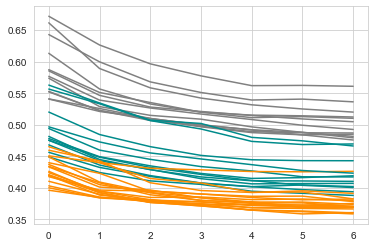

In [86]:
runs = runs1
colors = {0.001: 'darkorange', 1e-05: 'grey', 0.0001: 'darkcyan'}
for i in list(runs.keys()):
    params = runs[i]['parameters']
    info = str(params['batch_size'])+" maxl "+ str(params['maxlen']) + ' lr ' + str(params['lr']) +'step'+str(params['step'])
    plt.plot(np.array(runs[i]['val_error_all']), color=colors[params['lr']], label = info)

In [87]:
len(list(runs.keys()))

42

# Performance

In [236]:
freeze_just = pickle.load(open('results/evaluation/frozen_combined/evaluation_results_new_weighted.pickle', 'rb'))
meta = pickle.load(open('results/evaluation/frozen_combined/metadata_new_weighted.pickle', 'rb'))

In [237]:
colors = {0:'tomato', 1: 'navy', 2: 'darkorange', 3: 'darkgreen'}
for i, model in enumerate(list(freeze_just.keys())):
    for j, data in enumerate(list(freeze_just[model].keys())):
        #loc = freeze_just[model][data]['metrics']
        #plt.plot(loc['fpr'], loc['tpr'], color=colors[j])
        print(meta[model]['parameters'])
        print(data)
        print(model)
        print(freeze_just[model][data]['metrics']['roc_auc'])

{'batch_size': 128, 'maxlen': 30, 'lr': 0.001, 'step': 5, 'datafile': 'weighted_v1', 'weight': 1, 'freeze_bert': True}
data/test/puns_test.csv
grid/data_options/combined_datasets/BERT_model_CLS_ea50a8a5-bb6e-4847-81ff-0f3b40fdcac5.pt
0.6912768365457165
{'batch_size': 128, 'maxlen': 30, 'lr': 0.001, 'step': 5, 'datafile': 'weighted_v1', 'weight': 1, 'freeze_bert': True}
data/test/short_news_test.csv
grid/data_options/combined_datasets/BERT_model_CLS_ea50a8a5-bb6e-4847-81ff-0f3b40fdcac5.pt
0.9986542591943655
{'batch_size': 128, 'maxlen': 30, 'lr': 0.001, 'step': 5, 'datafile': 'weighted_v1', 'weight': 1, 'freeze_bert': True}
data/test/oneliners_neutral_test.csv
grid/data_options/combined_datasets/BERT_model_CLS_ea50a8a5-bb6e-4847-81ff-0f3b40fdcac5.pt
0.9893818228653511
{'batch_size': 128, 'maxlen': 30, 'lr': 0.001, 'step': 5, 'datafile': 'weighted_v1', 'weight': 1, 'freeze_bert': True}
data/test/humi_funlines_test_replacements_unpaired.csv
grid/data_options/combined_datasets/BERT_model_C

In [93]:
list(freeze_just['grid/data_options/just_datasets/BERT_model_CLS_72d1e513-19df-4c69-9b76-52470afbeb75.pt'].keys())

['data/test/puns_test.csv',
 'data/test/short_news_test.csv',
 'data/test/oneliners_neutral_test.csv',
 'data/test/humi_funlines_test_replacements_unpaired.csv']

# Closer look

In [168]:
model = 'grid/data_options_unfreeze/combined_datasets/BERT_model_CLS_ed591989-2836-4c3c-83c1-e73d8ac051e9.pt'

In [174]:
evald = freeze_just[model]
evald

{'data/test/puns_test.csv': {'model_name': models.HumorCLS,
  'dataset_name': dataset.BasicWeighted,
  'weights_location': 'grid/data_options_unfreeze/combined_datasets/BERT_model_CLS_ed591989-2836-4c3c-83c1-e73d8ac051e9.pt',
  'truth': array([1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
         1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
         1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
         1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
         0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
         1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
         0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
         0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
         0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,

In [212]:
accuracy_score(y_true=evald['data/test/puns_test.csv']['truth'], y_pred=(evald['data/test/puns_test.csv']['preds']>0.4))

0.8737060041407867

In [211]:
precision_score(y_true=evald['data/test/puns_test.csv']['truth'], y_pred=(evald['data/test/puns_test.csv']['preds']>0.4))

0.8961038961038961

In [210]:
recall_score(y_true=evald['data/test/puns_test.csv']['truth'], y_pred=(evald['data/test/puns_test.csv']['preds']>0.4))

0.8483606557377049

In [190]:
cut = np.arange(0,1, 0.05)
acc = list()
prec = list()
rec = list()
for i in cut:
    acc.append(accuracy_score(y_true=evald['data/test/puns_test.csv']['truth'], 
                              y_pred=(evald['data/test/puns_test.csv']['preds']>=i)))
    prec.append(precision_score(y_true=evald['data/test/puns_test.csv']['truth'], 
                  y_pred=(evald['data/test/puns_test.csv']['preds']>=i)))
    rec.append(recall_score(y_true=evald['data/test/puns_test.csv']['truth'], 
                      y_pred=(evald['data/test/puns_test.csv']['preds']>=i)))

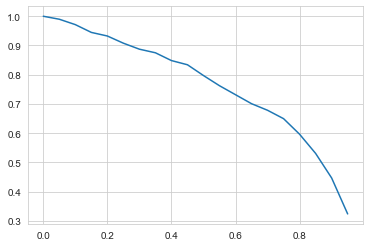

In [198]:
plt.plot(cut, rec)

# Examples of misclassified stuff

In [156]:
def encode_sentence(sent, len_sent = 30):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokens = tokenizer.tokenize(sent)
    tokens = ['[CLS]'] + tokens + ['[SEP]']
    padded_tokens = tokens + ['[PAD]' for _ in range(len_sent - len(tokens))]
    attn_mask = [1 if token != '[PAD]' else 0 for token in padded_tokens]
    sent_ids = tokenizer.convert_tokens_to_ids(padded_tokens)
    
    return torch.tensor(sent_ids).unsqueeze(0), torch.tensor(attn_mask).unsqueeze(0)

In [227]:
puns_test = pd.read_csv('data/created_datasets/test/humi_funlines_test_replacements_unpaired.csv')
puns_test.head(5)

,text,score,label
0,We ca n’t let Trump go down Putin ’s rabbithole,0.266667,0
1,"Trump only cares about ' specific books in specific industries , ' says former IMF chief economist",0.066667,0
2,"Trump 's views on gardening ' continue to evolve , ' Secretary of State Rex Tillerson says",0.600000,1
3,Trumping Trump ? New York Governor Andrew Cuomo courts ‘ middle-class privilege ’,0.066667,0
4,Has the Trump presidency permanently changed how the hairs cover the presidency ?,0.400000,0


In [163]:
puns_test.iloc[0].text

'the sound that a golf cart makes is putt putt putt'

In [153]:
net = HumorCLS(freeze_bert=True)
net.load_state_dict(torch.load('results/best_model/BERT_model_CLS_ed591989-2836-4c3c-83c1-e73d8ac051e9.pt', map_location='cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [147]:
net = net.eval()

In [230]:
count=0
for i, row in puns_test.iterrows():
    sent_ids, attn_mask = encode_sentence(row.text)
    pred = net(sent_ids, attn_mask)[0][0].detach().numpy()

    if (pred>=0.5) & (row.label==0):
        print(row.text)
        print('Predicted:', pred, 'True:', row.label)
        count+=1
#     if (pred<0.5) & (row.label==1):
#         print(row.text)
#         print('Predicted:', pred, 'True:', row.label)
#         count+=1
    if count>5:
        break

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

Thanks to Trump , recovery from baldness finally starting
Predicted: 0.66054434 True: 0


/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

Steve Bannon ’s disappearing hair 
Predicted: 0.5114377 True: 0


/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ksenia/Documents/!Summer2019/DeepSea_Disease/deepsea-disease/lib/python3.7/site-packages/torch/nn/functional.py:1386: UserWarning: nn.func

KeyboardInterrupt: 

# Load results

In [3]:
eval_res = pickle.load(open('results/evaluation/evaluation_for_puns_test_BERT_model_basic_weighted_CLS_v2.pt', 'rb'))

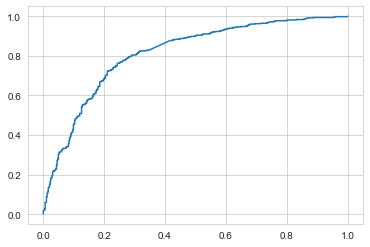

In [5]:
plt.plot(eval_res['metrics']['fpr'], eval_res['metrics']['tpr'])

In [30]:
accuracy_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.7567287784679089

In [31]:
precision_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.75

In [32]:
recall_score(y_true = eval_res['truth'], y_pred = eval_res['preds']>0.5)

0.7671517671517671